In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import pytz

# Settings
sns.set(style="whitegrid")
%matplotlib inline


base_path = r"C:\Users\chara\Downloads\task2"  # Replace with your path

In [2]:

file_paths = {
    'crime_scene': os.path.join(base_path, 'crime_scene_report.csv'),
    'security_logs': os.path.join(base_path, 'security_logs.csv'),
    'location_history': os.path.join(base_path, 'location_history.csv'),
    'digital_evidence': os.path.join(base_path, 'digital_evidence.csv'),
    'forensic_evidence': os.path.join(base_path, 'forensic_evidence.csv'),
    'financial_transactions': os.path.join(base_path, 'financial_transactions.csv'),
    'interviews': os.path.join(base_path, 'interview.csv'),
    'relationships': os.path.join(base_path, 'relationships.csv'),
    'person': os.path.join(base_path, 'person.csv'),
    'location': os.path.join(base_path, 'location.csv'),
    'company': os.path.join(base_path, 'company.csv'),
    'social_media': os.path.join(base_path, 'social_media.csv'),
    'drivers_license': os.path.join(base_path, 'drivers_license.csv'),
    'employment': os.path.join(base_path, 'employment.csv')
}

In [3]:
# debug
print("Current Working Directory:", os.getcwd())
for name, path in file_paths.items():
    if os.path.exists(path):
        print(f"Found {name} at {path}")
    else:
        print(f"File {path} not found in {os.getcwd()}")

Current Working Directory: C:\Users\chara
Found crime_scene at C:\Users\chara\Downloads\task2\crime_scene_report.csv
Found security_logs at C:\Users\chara\Downloads\task2\security_logs.csv
Found location_history at C:\Users\chara\Downloads\task2\location_history.csv
Found digital_evidence at C:\Users\chara\Downloads\task2\digital_evidence.csv
Found forensic_evidence at C:\Users\chara\Downloads\task2\forensic_evidence.csv
Found financial_transactions at C:\Users\chara\Downloads\task2\financial_transactions.csv
Found interviews at C:\Users\chara\Downloads\task2\interview.csv
Found relationships at C:\Users\chara\Downloads\task2\relationships.csv
Found person at C:\Users\chara\Downloads\task2\person.csv
Found location at C:\Users\chara\Downloads\task2\location.csv
Found company at C:\Users\chara\Downloads\task2\company.csv
Found social_media at C:\Users\chara\Downloads\task2\social_media.csv
Found drivers_license at C:\Users\chara\Downloads\task2\drivers_license.csv
Found employment at C:

In [4]:
# Load datasets
data = {}
for name, path in file_paths.items():
    try:
        data[name] = pd.read_csv(path)
        print(f"Successfully loaded {name} from {path} with shape: {data[name].shape}")
    except FileNotFoundError:
        print(f"File {path} not found. Please provide the correct path or move the file to {base_path}.")
    except Exception as e:
        print(f"Error loading {name} from {path}: {e}")

Successfully loaded crime_scene from C:\Users\chara\Downloads\task2\crime_scene_report.csv with shape: (8, 9)
Successfully loaded security_logs from C:\Users\chara\Downloads\task2\security_logs.csv with shape: (56, 8)
Successfully loaded location_history from C:\Users\chara\Downloads\task2\location_history.csv with shape: (14, 6)
Successfully loaded digital_evidence from C:\Users\chara\Downloads\task2\digital_evidence.csv with shape: (23, 7)
Successfully loaded forensic_evidence from C:\Users\chara\Downloads\task2\forensic_evidence.csv with shape: (24, 8)
Successfully loaded financial_transactions from C:\Users\chara\Downloads\task2\financial_transactions.csv with shape: (30, 10)
Successfully loaded interviews from C:\Users\chara\Downloads\task2\interview.csv with shape: (18, 7)
Successfully loaded relationships from C:\Users\chara\Downloads\task2\relationships.csv with shape: (35, 7)
Successfully loaded person from C:\Users\chara\Downloads\task2\person.csv with shape: (30, 11)
Success

In [9]:
#  function to convert date and time
def convert_to_datetime(date_col, time_col=None, is_unix=False):
    if is_unix:
        return pd.to_datetime(date_col, unit='s', utc=True).dt.tz_convert('UTC')
    if time_col is not None:
        return pd.to_datetime(date_col.astype(str) + time_col.astype(str).str.zfill(4), format='%Y%m%d%H%M')
    return pd.to_datetime(date_col, format='%Y%m%d')

In [29]:
# Step 1: Crime Scene Analysis
# basic facts about the murder
# i printed some random messages in else because i dont know what to print

if 'crime_scene' in data and not data['crime_scene'].empty:
    crime_scene = data['crime_scene'][data['crime_scene']['id'] == 1]
    print("\nCrime Scene Report (Armstrong Murder):")
    print(crime_scene[['date', 'type', 'description', 'evidence_collected']])
    print("\nKey Observations:")
    print("- Date: June 15, 2023")
    print("- Cause: Poisoning (tetrodotoxin, digitalis, polonium)")
    print("- Evidence: Quantum encryption device, diplomatic badge, Project Phoenix fragments")
    print("- Notes: Security system tampering, merger implications")
else:
    print("\nhmmm.")




Crime Scene Report (Armstrong Murder):
       date    type                                        description  \
0  20230615  murder  Tech billionaire Elijah Armstrong found dead i...   

                                  evidence_collected  
0  Multiple poison traces, quantum encryption dev...  

Key Observations:
- Date: June 15, 2023
- Cause: Poisoning (tetrodotoxin, digitalis, polonium)
- Evidence: Quantum encryption device, diplomatic badge, Project Phoenix fragments
- Notes: Security system tampering, merger implications


In [33]:
# Step 2: Timeline Construction
# Build a timeline of events on June 15 2023
# Process security logs
if 'security_logs' in data and not data['security_logs'].empty:
    security_timeline = data['security_logs'].copy()
    security_timeline['datetime'] = convert_to_datetime(security_timeline['date'], security_timeline['time'])
    # Filter for June 15, 2023, around murder time (20:15-20:45)
    murder_window = security_timeline[
        (security_timeline['datetime'] >= '2023-06-15 18:00:00') &
        (security_timeline['datetime'] <= '2023-06-15 22:00:00') &
        (security_timeline['location_id'] == 1)
    ]
    # Merge with person data for names
    if 'person' in data and not data['person'].empty:
        security_timeline = security_timeline.merge(data['person'][['id', 'name']], left_on='person_id', right_on='id', how='left')
        print("\nSecurity Logs Timeline (CryptoSphere HQ, June 15, 18:00-22:00):")
        print(security_timeline[['datetime', 'name', 'action', 'details', 'camera_id']])
    else:
        print("\nhmmm.")


Security Logs Timeline (CryptoSphere HQ, June 15, 18:00-22:00):
              datetime                      name             action  \
0  2023-06-15 17:05:00          Elijah Armstrong              Enter   
1  2023-06-15 18:32:00            Emma Rodriguez               Exit   
2  2023-06-15 18:45:00              Viktor Radek              Enter   
3  2023-06-15 19:55:00              David Okafor               Exit   
4  2023-06-15 20:12:00              Viktor Radek               Exit   
5  2023-06-15 20:15:00             Marcus Taylor              Enter   
6  2023-06-15 20:25:00             Marcus Taylor               Exit   
7  2023-06-15 20:26:00             Marcus Taylor              Enter   
8  2023-06-15 20:48:00             Marcus Taylor               Exit   
9  2023-06-15 20:49:00             Marcus Taylor              Enter   
10 2023-06-15 21:10:00             Marcus Taylor               Exit   
11 2023-06-15 21:11:00             Marcus Taylor              Enter   
12 2023-06-1

In [35]:
# Process location history
if 'location_history' in data and not data['location_history'].empty:
    location_timeline = data['location_history'].copy()
    location_timeline['datetime'] = convert_to_datetime(location_timeline['timestamp'], is_unix=True)
    if 'person' in data and not data['person'].empty and 'location' in data and not data['location'].empty:
        location_timeline = location_timeline.merge(data['person'][['id', 'name']], left_on='person_id', right_on='id', how='left')
        location_timeline = location_timeline.merge(data['location'][['id', 'name']], left_on='location_id', right_on='id', how='left', suffixes=('', '_location'))
        location_day = location_timeline[location_timeline['datetime'].dt.date == pd.to_datetime('2023-06-15').date()]
        print("\nLocation History (June 15, 2023):")
        print(location_day[['datetime', 'name', 'name_location', 'activity', 'duration']])
    else:
        print("\nhmmmhm.")




Location History (June 15, 2023):
                    datetime              name               name_location  \
0  2023-06-15 19:45:00+00:00  Elijah Armstrong             CryptoSphere HQ   
1  2023-06-15 21:00:00+00:00     Maya Davidson             The Grand Hotel   
2  2023-06-15 19:45:00+00:00      Viktor Radek        CryptoSphere R&D Lab   
3  2023-06-15 22:45:00+00:00      Viktor Radek      Viktor Radek Residence   
4  2023-06-15 21:00:00+00:00        Sarah Chen        Sarah Chen Residence   
5  2023-06-15 23:00:00+00:00        Sarah Chen             CryptoSphere HQ   
6  2023-06-15 19:00:00+00:00     Marcus Taylor             CryptoSphere HQ   
7  2023-06-15 17:00:00+00:00    Emma Rodriguez             CryptoSphere HQ   
8  2023-06-15 21:00:00+00:00    Jessica Parker     Marcus Taylor Residence   
9  2023-06-15 17:00:00+00:00      David Okafor             CryptoSphere HQ   
10 2023-06-15 21:00:00+00:00      David Okafor       JavaBeans Coffee Shop   
11 2023-06-15 17:00:00+00:00 

C:\Users\chara\AppData\Local\Temp\ipykernel_5752\4270554187.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


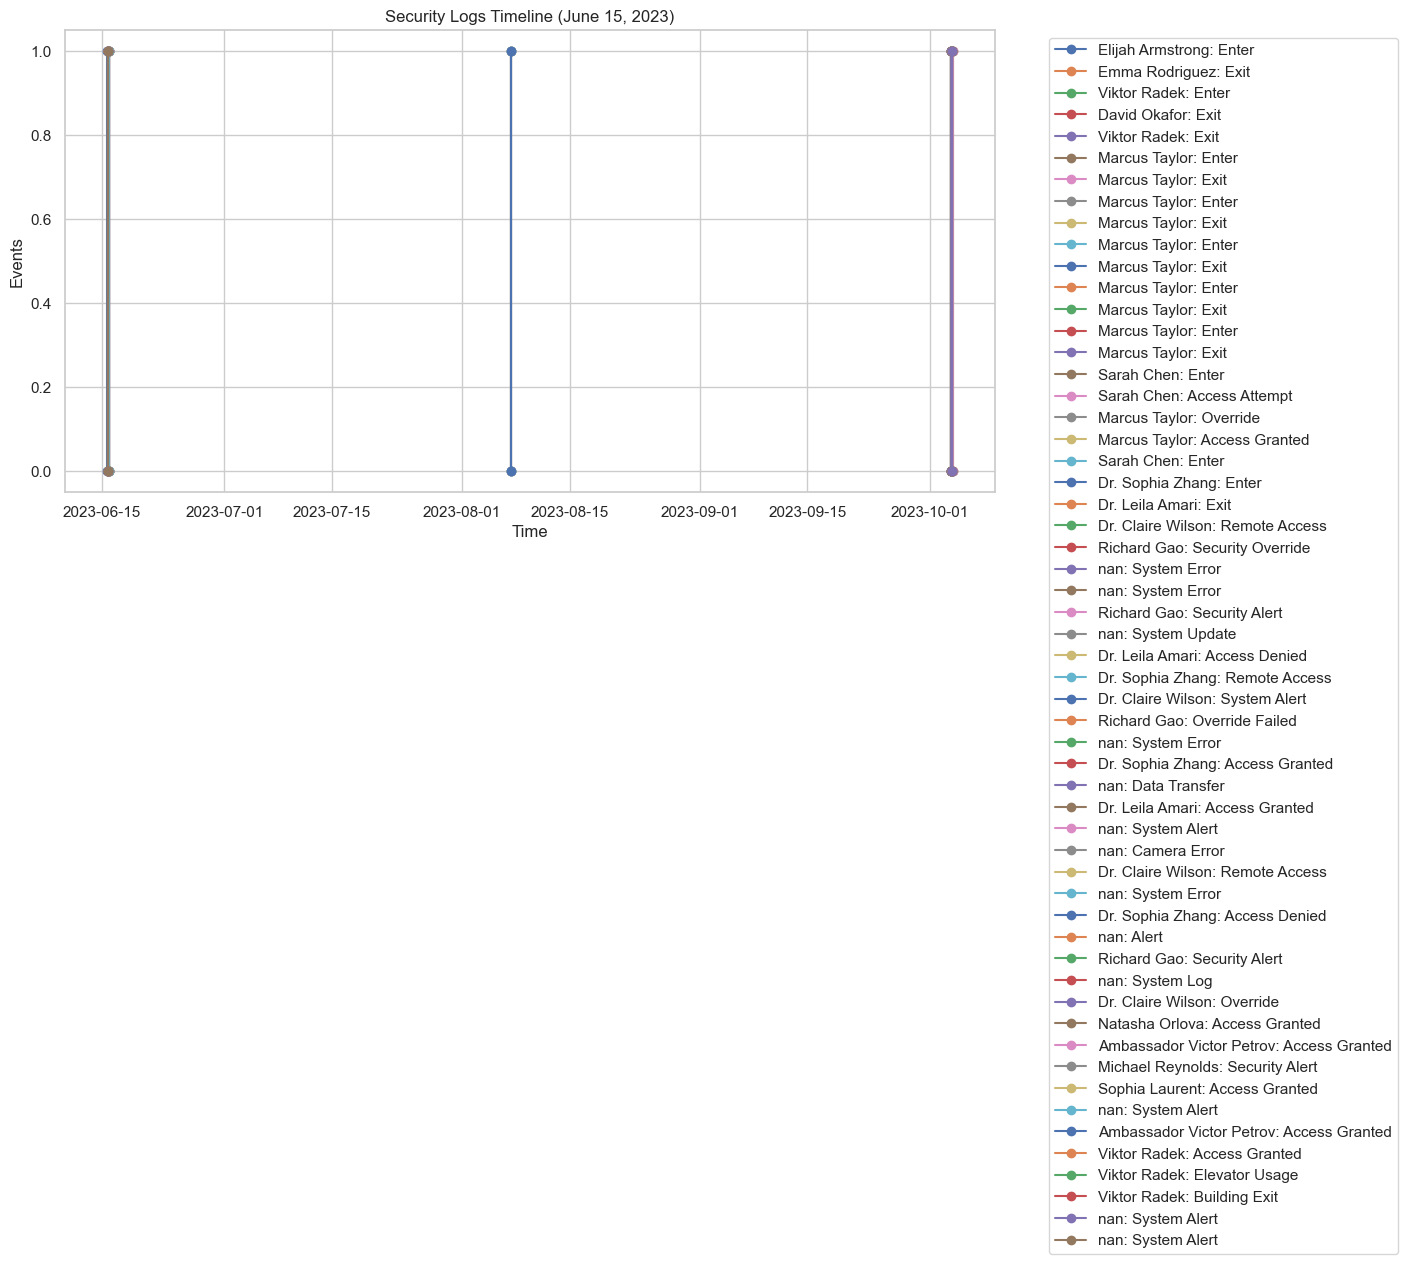

In [37]:
# Visualize timeline
if not security_timeline.empty:
    plt.figure(figsize=(12, 6))
    for _, row in security_timeline.iterrows():
       plt.plot([row['datetime'], row['datetime']], [0, 1], label=str(row['name']) + ': ' + str(row['action']), marker='o')

    plt.title('Security Logs Timeline (June 15, 2023)')
    plt.xlabel('Time')
    plt.ylabel('Events')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("\nhmmmmn.")

In [39]:
# Step 3: Physical Evidence Analysis
##  forensic evidence
if 'forensic_evidence' in data and not data['forensic_evidence'].empty:
    forensic = data['forensic_evidence'][data['forensic_evidence']['crime_scene_report_id'] == 1]
    high_confidence = forensic[forensic['confidence_level'] >= 0.8]
    print("\nHigh Confidence Forensic Evidence (Armstrong Case):")
    print(high_confidence[['type', 'description', 'person_id', 'confidence_level']])
    print("\nKey Forensic Observations:")
    print("- Toxins: Tetrodotoxin in coffee cup (20:15), digitalis in water glass, polonium on desk")
    print("- Fingerprints: Emma Rodriguez, Viktor Radek, Maya Davidson, Sophia Zhang, unknown diplomatic")
    print("- Digital: Quantum encryption signatures, simultaneous credential use")
    print("- Trace: Diplomatic uniform fibers, tetrodotoxin in car (plate SEC456)")
else:
    print("\n need to think.")


High Confidence Forensic Evidence (Armstrong Case):
           type                                        description  person_id  \
0    Toxicology  Multiple toxins detected: traces of tetrodotox...       10.0   
1  Fingerprints  Multiple fingerprints found: E. Rodriguez (cof...       30.0   
2    Electronic  Security system analysis shows multiple anomal...        NaN   
3      Document  Hidden compartment in desk contained: Project ...       10.0   
5       Digital  Advanced forensic analysis reveals: victim's c...        NaN   
6    Biological  Multiple DNA samples found: unknown female (li...        NaN   
7       Residue  Microscopic residue on a suit jacket (collecte...       30.0   
8       Digital  Deleted email recovery from Viktor Radek's per...       30.0   

   confidence_level  
0              0.98  
1              0.95  
2              0.92  
3              0.85  
5              0.90  
6              0.88  
7              0.98  
8              0.96  

Key Forensic Obser

In [41]:
# Step 4: Digital Footprrints
##  Analyze emails, messages, and logs for suspicious activities which may be usefulll
if 'digital_evidence' in data and not data['digital_evidence'].empty:
    digital = data['digital_evidence'].copy()
    digital['datetime'] = convert_to_datetime(digital['timestamp'], is_unix=True)
    suspicious_keywords = ['poison', 'kill', 'murder', 'Project Phoenix', 'merger', 'package']
    suspicious_digital = digital[
        digital['content'].str.contains('|'.join(suspicious_keywords), case=False, na=False) &
        (digital['datetime'].dt.date == pd.to_datetime('2023-06-15').date())
    ]
    if 'person' in data and not data['person'].empty:
        suspicious_digital = suspicious_digital.merge(data['person'][['id', 'name']], left_on='person_id', right_on='id', how='left')
        print("\nSuspicious Digital Evidence (June 15, 2023):")
        print(suspicious_digital[['datetime', 'name', 'device_type', 'content_type', 'content']])
    else:
        print("\nmight not be.")
else:
    print("\n might nit be.")


Suspicious Digital Evidence (June 15, 2023):
                   datetime              name       device_type  \
0 2023-06-15 16:02:00+00:00  Elijah Armstrong            Laptop   
1 2023-06-15 22:10:00+00:00  Elijah Armstrong      Mobile Phone   
2 2023-06-15 21:30:00+00:00  Elijah Armstrong   Office Computer   
3 2023-06-15 20:02:00+00:00      Viktor Radek            Tablet   
4 2023-06-15 22:10:00+00:00        Sarah Chen      Mobile Phone   
5 2023-06-15 22:10:00+00:00    Jessica Parker            Laptop   
6 2023-06-15 16:02:00+00:00     Maya Davidson      Mobile Phone   
7 2023-06-15 22:35:00+00:00  Dr. Sophia Zhang  Quantum Computer   
8 2023-06-15 21:58:00+00:00    Natasha Orlova   Personal Laptop   
9 2023-06-15 22:00:00+00:00      Viktor Radek   Personal Laptop   

        content_type                                            content  
0              Email  From: m.davidson@cryptosphere.com \r\nSubject:...  
1       Text Message  To: Sarah Chen\r\nTime: 19:50\r\nBody: Need an

In [43]:
# Step 5: Relationship Networks(helps in identifing the ones which are not close to him)
##   relationships and identify conflicts very usefull
if 'relationships' in data and not data['relationships'].empty:
    relationships = data['relationships'].copy()
    if 'person' in data and not data['person'].empty:
        relationships = relationships.merge(data['person'][['id', 'name']], left_on='person1_id', right_on='id', how='left', suffixes=('', '_person1'))
        relationships = relationships.merge(data['person'][['id', 'name']], left_on='person2_id', right_on='id', how='left', suffixes=('', '_person2'))
        conflicts = relationships[relationships['notes'].str.contains('strained|hostile|suspicious|conflict|dispute', case=False, na=False)]
        print("\nRelationships with Conflicts:")
        print(conflicts[['name', 'name_person2', 'relationship_type', 'notes']])
    else:
        print("\nmight not be.")
else:
    print("\n might not be.")


Relationships with Conflicts:
                name      name_person2 relationship_type  \
0   Elijah Armstrong     Maya Davidson      Professional   
4   Elijah Armstrong         Robert Li      Professional   
6      Maya Davidson      Viktor Radek          Personal   
8       Viktor Radek    Jessica Parker      Professional   
9         Sarah Chen  Elijah Armstrong          Personal   
17        Sarah Chen  Michael Reynolds         Financial   

                                                notes  
0   CEO-COO relationship, generally positive but i...  
4   Board member relationship, hostile after rejec...  
6   Former romantic relationship, ended after Proj...  
8           Suspicious pattern of late-night meetings  
9        Close friendship masking financial conflicts  
17                 Suspicious pattern of transactions  


In [45]:
# Step 6: Suspect Analysis(
## Identify suspects based on presence, motive, and evidence (these are the suspects i think) 
if 'person' in data and not data['person'].empty:
    suspects = ['Viktor Radek', 'Maya Davidson', 'Sarah Chen', 'Marcus Taylor', 'Emma Rodriguez', 'Natasha Orlova']
    suspect_ids = data['person'][data['person']['name'].isin(suspects)]['id']

    # Check suspect movements
    if 'security_logs' in data and not data['security_logs'].empty:
        suspect_security = security_timeline[security_timeline['person_id'].isin(suspect_ids)]
        print("\nSuspect Security Logs:")
        print(suspect_security[['datetime', 'name', 'action', 'details']])
    else:
        print("\n hmmm.")

    if 'location_history' in data and not data['location_history'].empty:
        suspect_locations = location_timeline[location_timeline['person_id'].isin(suspect_ids) & 
                                            (location_timeline['datetime'].dt.date == pd.to_datetime('2023-06-15').date())]
        print("\nSuspect Location History:")
        print(suspect_locations[['datetime', 'name', 'name_location', 'activity']])
    else:
        print("\n hmmm.")
        # Check financial trnsactions(super usefull)
    if 'financial_transactions' in data and not data['financial_transactions'].empty:
        transactions = data['financial_transactions'][
            (data['financial_transactions']['person_id'].isin(suspect_ids)) &
            (data['financial_transactions']['date'] == 20230615)
        ]
        transactions = transactions.merge(data['person'][['id', 'name']], left_on='person_id', right_on='id', how='left')
        print("\nSuspect Financial Transactions (June 15, 2023):")
        print(transactions[['name', 'transaction_type', 'amount', 'transaction_details']])
    else:
        print("\nhmmm.")
else:
    print("\n hmmmm .")


Suspect Security Logs:
              datetime            name          action  \
1  2023-06-15 18:32:00  Emma Rodriguez            Exit   
2  2023-06-15 18:45:00    Viktor Radek           Enter   
4  2023-06-15 20:12:00    Viktor Radek            Exit   
5  2023-06-15 20:15:00   Marcus Taylor           Enter   
6  2023-06-15 20:25:00   Marcus Taylor            Exit   
7  2023-06-15 20:26:00   Marcus Taylor           Enter   
8  2023-06-15 20:48:00   Marcus Taylor            Exit   
9  2023-06-15 20:49:00   Marcus Taylor           Enter   
10 2023-06-15 21:10:00   Marcus Taylor            Exit   
11 2023-06-15 21:11:00   Marcus Taylor           Enter   
12 2023-06-15 21:35:00   Marcus Taylor            Exit   
13 2023-06-15 21:36:00   Marcus Taylor           Enter   
14 2023-06-15 21:58:00   Marcus Taylor            Exit   
15 2023-06-15 21:47:00      Sarah Chen           Enter   
16 2023-06-15 21:53:00      Sarah Chen  Access Attempt   
17 2023-06-15 21:53:00   Marcus Taylor        Ov

In [47]:
# Step 7: Interview Analysis
##  question witness
if 'interviews' in data and not data['interviews'].empty:
    interviews = data['interviews'].copy()
    interviews['datetime'] = convert_to_datetime(interviews['interview_date'], interviews['interview_time'])
    if 'person' in data and not data['person'].empty:
        interviews = interviews.merge(data['person'][['id', 'name']], left_on='person_id', right_on='id', how='left')
        high_reliability = interviews[interviews['reliability_score'] >= 0.9]
        print("\nHigh Reliability Interviews:")
        print(high_reliability[['datetime', 'name', 'transcript', 'reliability_score']])
    else:
        print("\n might not be him.")
else:
    print("\n no data.")


High Reliability Interviews:
              datetime                      name  \
0  2023-06-16 10:45:00            Emma Rodriguez   
1  2023-06-16 11:30:00                Sarah Chen   
4  2023-06-16 18:15:00             Maya Davidson   
5  2023-06-17 09:30:00                 Robert Li   
7  2023-06-17 13:45:00              David Okafor   
8  2023-06-17 16:30:00             Thomas Wright   
9  2023-10-04 10:15:00          Dr. Sophia Zhang   
11 2023-10-04 13:30:00         Dr. Claire Wilson   
13 2023-08-08 10:45:00  Ambassador Victor Petrov   
14 2023-08-08 12:30:00            Natasha Orlova   
15 2023-08-08 14:15:00          Michael Reynolds   
16 2023-08-08 16:00:00            Sophia Laurent   
17 2023-06-17 17:30:00            Emma Rodriguez   

                                           transcript  reliability_score  
0   Mr. Armstrong asked me to reschedule his dinne...               0.95  
1   I was supposed to meet Elijah at 8:30 PM to go...               0.92  
4   I was at din

In [49]:
# Step 8: Social Media Analysis(it can be usefull)
##  Identify suspicious posts
if 'social_media' in data and not data['social_media'].empty:
    social_media = data['social_media'][
        (data['social_media']['date'] == 20230615) &
        (data['social_media']['person_id'].isin(suspect_ids))
    ]
    if 'person' in data and not data['person'].empty:
        social_media = social_media.merge(data['person'][['id', 'name']], left_on='person_id', right_on='id', how='left')
        print("\nSuspicious Social Media Posts (June 15, 2023):")
        print(social_media[['name', 'event_name', 'post_content']])
    else:
        print("\n no.")
else:
    print("\n no.")


Suspicious Social Media Posts (June 15, 2023):
             name          event_name  \
0   Maya Davidson    Executive Dinner   
1  Emma Rodriguez         Office Life   
2      Sarah Chen   Financial Meeting   
3  Natasha Orlova    Security Meeting   
4   Maya Davidson  Strategic Planning   

                                        post_content  
0  Fascinating discussions about the future of qu...  
1  Sometimes loyalty means making hard choices. T...  
2  Sometimes the numbers tell a different story t...  
3  When security protocols clash with diplomatic ...  
4  Sometimes the best moves aren't the most obvio...  


In [51]:
# Step 9: Cross-Reference Evidence(suspect right now is radek)
## Key Suspect: Viktor Radek
if 'forensic_evidence' in data and not data['forensic_evidence'].empty and 'digital_evidence' in data and not data['digital_evidence'].empty and 'security_logs' in data and not data['security_logs'].empty and 'interviews' in data and not data['interviews'].empty:
    print("\nEvidence Against Viktor Radek (person_id=30):")
    # Forensic
    radek_forensic = data['forensic_evidence'][data['forensic_evidence']['person_id'] == 30]
    print("\nForensic Evidence:")
    print(radek_forensic[['type', 'description', 'confidence_level']])
    # Digital
    radek_digital = suspicious_digital[suspicious_digital['person_id'] == 30]
    print("\nDigital Evidence:")
    print(radek_digital[['datetime', 'device_type', 'content']])
    # Security Logs
    radek_security = security_timeline[security_timeline['person_id'] == 30]
    print("\nSecurity Logs:")
    print(radek_security[['datetime', 'action', 'details']])
    # Interview
    radek_interview = data['interviews'][data['interviews']['person_id'] == 30]
    print("\nInterview:")
    print(radek_interview[['transcript', 'reliability_score']])
else:
    print("\n  might not be him.")



Evidence Against Viktor Radek (person_id=30):

Forensic Evidence:
            type                                        description  \
1   Fingerprints  Multiple fingerprints found: E. Rodriguez (cof...   
7        Residue  Microscopic residue on a suit jacket (collecte...   
8        Digital  Deleted email recovery from Viktor Radek's per...   
11         Audio  Enhanced audio reveals full conversation: \r\n...   

    confidence_level  
1               0.95  
7               0.98  
8               0.96  
11              0.96  

Digital Evidence:
                   datetime      device_type  \
3 2023-06-15 20:02:00+00:00           Tablet   
9 2023-06-15 22:00:00+00:00  Personal Laptop   

                                             content  
3  Technical assessment of Project Phoenix securi...  
9  To: n.orlova@diplomatic.secure.net\r\nSubject:...  

Security Logs:
              datetime          action  \
2  2023-06-15 18:45:00           Enter   
4  2023-06-15 20:12:00           

In [55]:
# Step 10: Motive and Accomplice Analysis( finding enought evidence)
if 'relationships' in data and not data['relationships'].empty and 'financial_transactions' in data and not data['financial_transactions'].empty and 'digital_evidence' in data:
    print("\nMotive Analysis:")
    print("- Viktor Radek: Disagreed with merger and Project Phoenix security flaws (relationships.csv, social_media.csv)")
    print("- Financial: Sold $2.75M in shares before merger (financial_transactions.csv)")
    print("- Natasha Orlova: Diplomatic connections, possible espionage (digital_evidence.csv, relationships.csv)")

    ## Accomplice: Natasha Orlova
    print("\nEvidence Against Natasha Orlova (person_id=170):")

    # Digital
    orlova_digital = suspicious_digital[suspicious_digital['person_id'] == 170]
    print("\nDigital Evidence:")
    print(orlova_digital[['datetime', 'device_type', 'content']])

    # Relationships
    orlova_relationships = data['relationships'][
        (data['relationships']['person1_id'] == 170) | (data['relationships']['person2_id'] == 170)
    ]
    print("\nRelationships:")
    print(orlova_relationships[['person1_id', 'person2_id', 'relationship_type', 'notes']])
else:
    print("\nhmmmmm.")



Motive Analysis:
- Viktor Radek: Disagreed with merger and Project Phoenix security flaws (relationships.csv, social_media.csv)
- Financial: Sold $2.75M in shares before merger (financial_transactions.csv)
- Natasha Orlova: Diplomatic connections, possible espionage (digital_evidence.csv, relationships.csv)

Evidence Against Natasha Orlova (person_id=170):

Digital Evidence:
                   datetime      device_type  \
8 2023-06-15 21:58:00+00:00  Personal Laptop   

                                             content  
8  To: k.vtk@diplomatic.secure.net\r\nSubject: Co...  

Relationships:
    person1_id  person2_id relationship_type  \
16          30         170        Classified   
21          80         170        Classified   
26         130         170      Intelligence   
34         110         170          Research   

                                       notes  
16          Unauthorized diplomatic contacts  
21    Security protocol breach investigation  
26  Unauthorized

In [57]:
# Step 11: Timeline of Critical Events(summary of all the events)
if 'security_logs' in data and not data['security_logs'].empty and 'digital_evidence' in data and not data['digital_evidence'].empty and 'forensic_evidence' in data and not data['forensic_evidence'].empty:
    print("\nTimeline of Critical Events (June 15, 2023):")
    timeline = [
        ("18:32", "Emma Rodriguez exits CryptoSphere HQ", "security_logs.csv"),
        ("18:45", "Viktor Radek enters CryptoSphere HQ (biometric offline)", "security_logs.csv"),
        ("19:20", "Viktor Radek emails Natasha Orlova about package delivery", "digital_evidence.csv"),
        ("19:50", "Elijah Armstrong texts Sarah Chen to delay meeting", "digital_evidence.csv"),
        ("19:55", "Elijah Armstrong locks office door", "digital_evidence.csv"),
        ("20:03", "Viktor Radek uses executive override on Armstrong's office", "security_logs.csv"),
        ("20:05", "Security system maintenance mode activated (Maya Davidson credentials)", "digital_evidence.csv"),
        ("20:15", "Tetrodotoxin detected in coffee cup", "forensic_evidence.csv"),
        ("20:20", "Emergency medical monitor detects cardiac failure", "security_logs.csv"),
        ("20:36", "Security override fails", "digital_evidence.csv"),
        ("21:53", "Marcus Taylor uses emergency override to access 50th floor", "security_logs.csv"),
        ("21:56", "Sarah Chen enters 50th floor after override", "security_logs.csv")
    ]
    for time, event, source in timeline:
        print(f"{time} - {event} ({source})")
else:
    print("\n not him.")


Timeline of Critical Events (June 15, 2023):
18:32 - Emma Rodriguez exits CryptoSphere HQ (security_logs.csv)
18:45 - Viktor Radek enters CryptoSphere HQ (biometric offline) (security_logs.csv)
19:20 - Viktor Radek emails Natasha Orlova about package delivery (digital_evidence.csv)
19:50 - Elijah Armstrong texts Sarah Chen to delay meeting (digital_evidence.csv)
19:55 - Elijah Armstrong locks office door (digital_evidence.csv)
20:03 - Viktor Radek uses executive override on Armstrong's office (security_logs.csv)
20:05 - Security system maintenance mode activated (Maya Davidson credentials) (digital_evidence.csv)
20:15 - Tetrodotoxin detected in coffee cup (forensic_evidence.csv)
20:20 - Emergency medical monitor detects cardiac failure (security_logs.csv)
20:36 - Security override fails (digital_evidence.csv)
21:53 - Marcus Taylor uses emergency override to access 50th floor (security_logs.csv)
21:56 - Sarah Chen enters 50th floor after override (security_logs.csv)


In [59]:
# Step 12: Final Conclusion
if all(key in data for key in ['forensic_evidence', 'digital_evidence', 'security_logs', 'interviews', 'relationships', 'financial_transactions']) and all(not data[key].empty for key in ['forensic_evidence', 'digital_evidence', 'security_logs', 'interviews', 'relationships', 'financial_transactions']):
    print("\nFinal Conclusion:")
    print("Murderer: Viktor Radek (person_id=30)")
    print("- Evidence: Fingerprints on laptop, tetrodotoxin residue on suit, override code use at 20:03, email to Natasha Orlova about 'package delivery', presence at HQ during murder window.")
    print("- Method: Poisoned Elijah Armstrong with tetrodotoxin in coffee, likely delivered during office access at 20:03.")
    print("- Motive: Opposed merger and Project Phoenix due to security flaws and personal financial loss (share reduction from 15% to 7.5%).")
    print("- Accomplice: Natasha Orlova (person_id=170)")
    print("- Evidence: Email exchange with Viktor confirming package delivery, diplomatic connections, and classified relationship with Viktor.")
    print("- Wider Conspiracy: Links to international quantum espionage, involving diplomatic override codes and Project Phoenix vulnerabilities, connected to Dr. Zhang's murder.")
    print("\nInvestigation complete.")
else:
    print("\n ** might not be him")


Final Conclusion:
Murderer: Viktor Radek (person_id=30)
- Evidence: Fingerprints on laptop, tetrodotoxin residue on suit, override code use at 20:03, email to Natasha Orlova about 'package delivery', presence at HQ during murder window.
- Method: Poisoned Elijah Armstrong with tetrodotoxin in coffee, likely delivered during office access at 20:03.
- Motive: Opposed merger and Project Phoenix due to security flaws and personal financial loss (share reduction from 15% to 7.5%).
- Accomplice: Natasha Orlova (person_id=170)
- Evidence: Email exchange with Viktor confirming package delivery, diplomatic connections, and classified relationship with Viktor.
- Wider Conspiracy: Links to international quantum espionage, involving diplomatic override codes and Project Phoenix vulnerabilities, connected to Dr. Zhang's murder.

Investigation complete.


In [ ]:
# my enti